<a href="https://colab.research.google.com/github/AOlivr/SER-347_Scripts/blob/main/projeto_firescar_inpe_v05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = 6> <center> INSTITUTO NACIONAL DE PESQUISAS ESPACIAIS </center> </font>

<b> Grupo 6: </b> <p> Alana Sales </p>
<p> Alisson de Oliveira </p> 
<p> Arthur Citó </p> 
<p> Vanessa Vicentini </p> 

<font size = 5> <b>Tema</b>: Criar amostras de classificação por meio de crescimento de regiões. </font>

[...] Espera-se, ao final desse trabalho, que a metodologia
desenvolvida possa apresentar um bom resultado na diferenciação de cicatrizes de fogo
dos demais alvos com baixo valor de NDVI, ao receber as coordenadas de determinado
ponto geográfico (linhas e colunas ou latitude e longitude) que designa uma cicatriz de fogo
e fazer, a partir do pixel correspondente à coordenada geográfica informada, o crescimento
da região com base na seleção automática em cadeia dos pixels vizinhos ao pixel inicial,
até que a cicatriz do fogo seja completamente delimitada.

<center> <font size = 4> <b> Instalando bibliotecas e módulos </b> </font> </center>

In [ ]:
# Instalando bibliotecas
!pip install rasterio
!pip install matplotlib_scalebar
!pip install matplotlib.patches

In [2]:
# Importação das bibliotecas e módulos
from osgeo import gdal
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.patches as mpatches
import numpy as np
import rasterio
gdal.UseExceptions()

In [ ]:
# Se as imagens estiverem salvas no Google Drive, deve-se aplicar este comando para ter acesso.
from google.colab import drive 
drive.mount('/content/drive')

<center> <font size = 4> <b> NDVI PRÉ FOGO - CBERS4A - Parque Nacional da Chapada dos Veadeiros </b> </font> </center>

In [3]:
# Ao escrever o link de acesso do arquivo é importante colocar 'r' antes da string para o reconhecimento correto do caminho
redprefogo = gdal.Open(r'/content/PREFogo_Cena01_CBERS_4A_MUX_20210816_207_131_L4_BAND7_RED.tif', gdal.GA_ReadOnly)
nirprefogo = gdal.Open(r'/content/PREFogo_Cena01_CBERS_4A_MUX_20210816_207_131_L4_BAND8_RED.tif', gdal.GA_ReadOnly)

In [4]:
# Criação de uma matriz NumPy. Permite o uso de todas as operações da NumPy.
matriz_redprefogo = redprefogo.ReadAsArray()
matriz_nirprefogo = nirprefogo.ReadAsArray()

In [5]:
# Transformação do tipo de dado de Int16 para Float. Importante para realizar o cálculo do NDVI.
matriz_redprefogo = matriz_redprefogo.astype(float)
matriz_nirprefogo = matriz_nirprefogo.astype(float)

# Cálculo do NDVI Pré-Fogo
ndvi_prefogo = (matriz_nirprefogo - matriz_redprefogo) / (matriz_redprefogo + matriz_nirprefogo + 0.000000001)

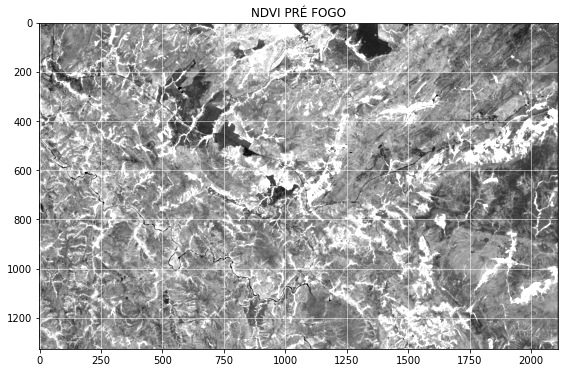

In [6]:
# Exibe a imagem do NDVI pré-fogo
plt.figure(figsize=(12,6))
plt.title('NDVI PRÉ-FOGO')
plt.imshow(ndvi_prefogo, cmap='gray', vmin=0, vmax=0.5)
plt.grid(color='w', linestyle='-', linewidth=0.5)

<center> <font size = 4> <b> NDVI PÓS FOGO - CBERS4A - Parque Nacional da Chapada dos Veadeiros </b> </font> </center>

In [7]:
redposfogo = gdal.Open('/content/POSFogo_Cena01_CBERS_4A_MUX_20210916_207_131_L4_BAND7_RED.tif', gdal.GA_ReadOnly)
nirposfogo = gdal.Open('/content/POSFogo_Cena01_CBERS_4A_MUX_20210916_207_131_L4_BAND8_NIR.tif', gdal.GA_ReadOnly)

In [8]:
matriz_redposfogo = redposfogo.ReadAsArray()
matriz_nirposfogo = nirposfogo.ReadAsArray()

In [9]:
matriz_redposfogo = matriz_redposfogo.astype(float)
matriz_nirposfogo = matriz_nirposfogo.astype(float)

# Cálculo do NDVI Pós-Fogo
ndvi_posfogo = (matriz_nirposfogo - matriz_redposfogo) / (matriz_nirposfogo + matriz_redposfogo + 0.000000001)

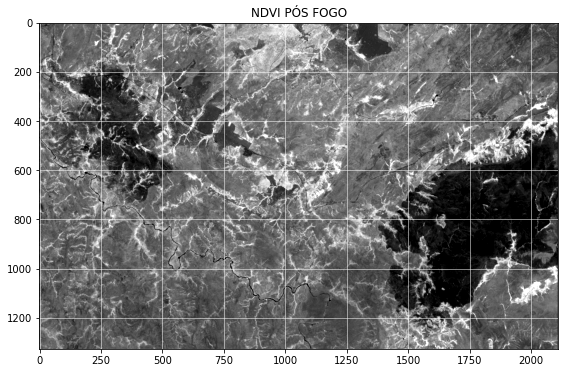

In [10]:
plt.figure(figsize=(12,6))
plt.title("NDVI PÓS-FOGO")
plt.imshow(ndvi_posfogo, cmap='gray', vmin=0, vmax=0.5)
plt.grid(color='w', linestyle='-', linewidth=0.5)

<center> <font size = 4> <b> Diferença entre os NDVI pré-fogo e pós-fogo </b> </font> </center>

In [42]:
# Obtém-se a diferença das duas imagens a partir de uma subtração simples
ndvi_diferenca = ndvi_prefogo - ndvi_posfogo

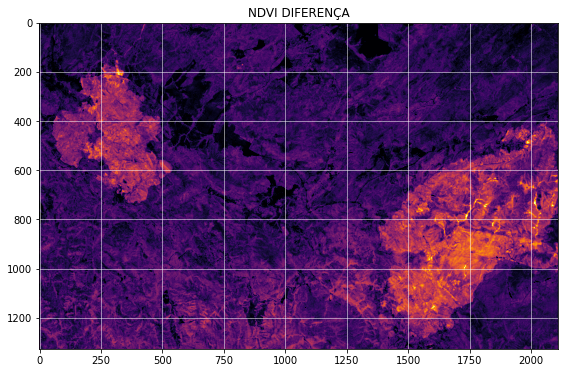

In [43]:
# Quanto mais clara a região, maior a modificação na estrutura da vegetação entre o período anterior e o posterior ao fogo.
plt.figure(figsize=(12,6))
plt.title("NDVI DIFERENÇA")
plt.imshow(ndvi_diferenca, cmap='inferno', vmin=0, vmax=0.5)
plt.grid(color='w', linestyle='-', linewidth=0.5)

<center> <font size = 4> <b> Crescimento de região  </b> </font> </center>

In [13]:
# Cria, a partir da matriz da diferença de ndvi, uma matriz binária, onde 1 = não cicatriz; e 2 = cicatriz potencial
copy = np.zeros(shape=(ndvi_diferenca.shape), dtype=np.uint8)  
copy = np.where(ndvi_diferenca < 0.15, 1, np.where(ndvi_diferenca >= 0.15, 0, 0))

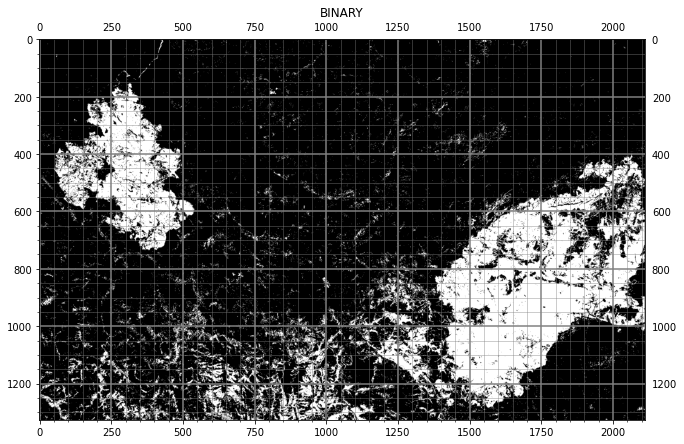

In [15]:
# Plota a matriz binária
plt.figure(figsize=(18,7))
plt.title('BINARY')
plt.imshow(copy, cmap='binary')
plt.grid(b=True, which='major', color='gray', linestyle='-', linewidth = 1.5)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='gray', linestyle='-', alpha=1.5)
plt.tick_params(labeltop=True, labelright=True)
plt.show()

In [24]:
# Input das coordenadas em linha e coluna
coords = []
xline = int(input('Line: '))
ycolumn = int(input('Column: '))
coords.append (xline-1)
coords.append (ycolumn-1)

Line: 450
Column: 300


In [25]:
# Seleciona os arredores do pixel informado com x número de interações
num_neighbor = 1

while (num_neighbor < 1000):
  left = max(0,coords[0]-num_neighbor)
  right = max(0,coords[0]+num_neighbor+1)
  bottom = max(0,coords[1]-num_neighbor)
  top = max(0,coords[1]+num_neighbor+1)
  matriz_run = copy[left:right,bottom:top]  

  if (matriz_run == 1).all():
    print ('O valor central deve ser 0')
    break

  else:
    for item in matriz_run:
      if (item == 0).any():
        num_neighbor = num_neighbor + 1

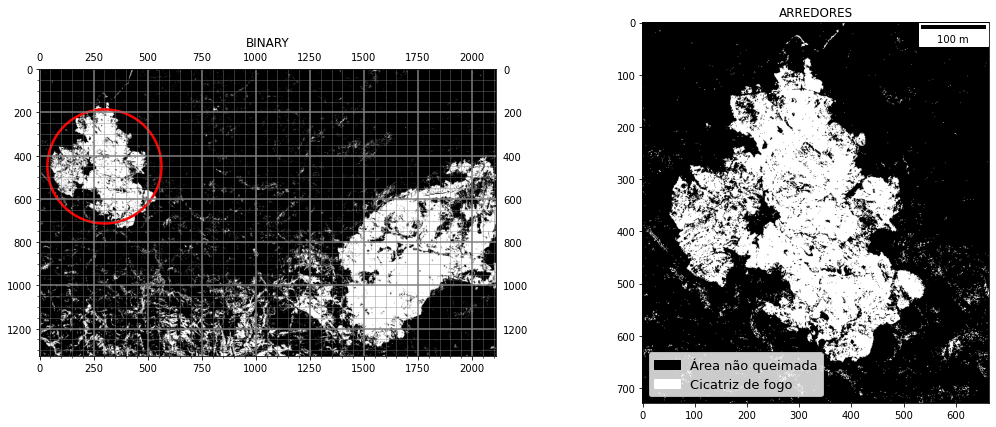

In [68]:
# Plota, com base na matriz binária, uma nova matriz criada a partir da coordenada informada anteriormente
plt.figure(figsize=(18, 7))
plt.subplot(121)
plt.title('BINARY')
plt.imshow(copy, cmap='binary')
plt.grid(b=True, which='major', color='gray', linestyle='-', linewidth = 1.5)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='gray', linestyle='-', alpha=1.5)
plt.tick_params(labeltop=True, labelright=True)
plt.scatter(ycolumn,xline, s=13000, facecolors='None', edgecolors='red', linewidths=2.5)

plt.subplot(122)
plt.title('ARREDORES')
scalebar = ScaleBar(0.8) # 1 pixel = 8 metros
plt.gca().add_artist(scalebar)
plt.imshow(matriz_run, cmap='binary');
black_patch = mpatches.Patch(color='black', label='Área não queimada')
white_patch = mpatches.Patch(color='white', label='Cicatriz de fogo')
plt.legend(handles=[black_patch, white_patch], loc='lower left', prop={'size': 13});

<center> <font size = 4> <b> Retorno rápido da área em km² e em hectares </b> </font> </center>

In [27]:
# Realiza-se o cálculo da área estimada das cicatrizes de fogo, área não queimada e da área total
area = []
area_intacta = []

for item in matriz_run:
  for i in item:
    if (i == 0):
      i = (16**2)
      area.append(i)
    else:
      i = (16**2)
      area_intacta.append(i)

area_km = (sum(area) / 1000)
area_ha = (area_km * 100)
print ('Área estimada das cicatrizes de fogo: ',area_km,'km²')
print ('                                      ',area_ha,'ha')

print ("""
""")

area_intacta_km = (sum(area_intacta) / 1000)
area_intacta_ha = (area_intacta_km * 100)
print ('Área não queimada:                    ',area_intacta_km,'km²')
print ('                                      ',area_intacta_ha,'ha')

print ("""
""")

total_km = (area_km + area_intacta_km)
total_ha = (area_ha + area_intacta_ha)
print ('Área total                            ',total_km,'km²')
print ('                                      ',total_ha,'ha')

Área estimada das cicatrizes de fogo:  30973.184 km²
                                       3097318.4 ha


Área não queimada:                     92945.152 km²
                                       9294515.2 ha


Área total                             123918.33600000001 km²
                                       12391833.6 ha


<center> <font size = 4> <b> Georreferenciamento da cena binária da diferença pré e pós-fogo </b> </font> </center>

In [28]:
print(redprefogo.GetGeoTransform())

(814656.0, 16.0, 0.0, 8436640.0, 0.0, -16.0)


In [29]:
print (redprefogo.GetProjectionRef())

PROJCS["WGS 84 / UTM zone 22S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-51],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32722"]]


In [34]:
print(copy.shape)
print(copy.dtype)

(1327, 2111)
int64


In [35]:
# Transformação de int64 para int16 - O código do rasterio não aceitou dado tipo int64
copy16 = copy.astype('int16')

# Transformçao AFIM
new_transform = rasterio.transform.from_origin(814656, 8436640, 16, 16)
new_transform

Affine(16.0, 0.0, 814656.0,
       0.0, -16.0, 8436640.0)

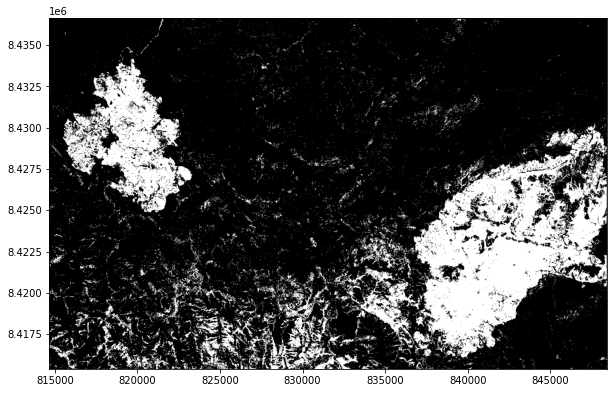

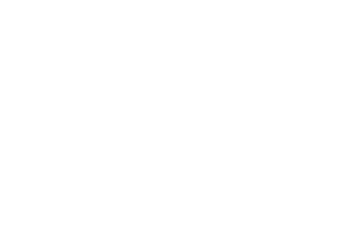

In [47]:
# Visualização do resultado da classificação
from rasterio.plot import show
fig, ax = plt.subplots(figsize=(10,10))
show(copy, cmap='binary', transform=new_transform)
plt.axis('off');

<center> <font size = 4> <b> Exportando a imagem como raster (.tif) </b> </font> </center>

In [39]:
#Criando um arquivo raster registrado (georreferenciado)
new_dataset = rasterio.open(
    "/content/fire_scar_01.tif", # Criação de um arquivo .tif para os ficheiros
    "w", # Parametro que significa "Write", para escrever infos sobre arquivo (fire_scar.tif). Diferente de "OnlyRead" no caso do Gdal.
    driver = "GTiff",
    height = 1321, # Número de linhas do array numpay (matriz_run).
    width = 2111, # Número de colunas do array numpay (matriz_run).
    count = 1, # Número de bandas a serem registradas 
    dtype = 'int16', # Data Type do arquivo .tif a ser criado
    crs = 32722, # SRC baseado no array numpy (matriz_run).
    transform = new_transform # Transformação afim baseado no array numpy (matriz_run).
)

new_dataset.write(copy, 1) # Escrita do arquivo (fire_scar.tif) que leva 2 parãmetros: array numpy original e o índice da banda a ser gravada.

new_dataset.close() # Fecha o atributo de escrita do arquivo, A partir daqui não se pode mais gravar sobre esse arquio criado (fire_scar.tif)

<font size = 4> <b> Principais desafios encontrados: </font> </b>
- Interpolar os vizinhos próximos
- Georreferenciar a matriz interpolada

<font size = 4> <b> Outras funcionalidades </font> </b>
- Vetorizar as cicatrizes de fogo
- Informar a coordenada de interesse através do click do mouse
